# Credit Card Fraud Detection

# Dataset

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 

# Analyze the Data

In [8]:
#Import the relevant modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [9]:
#Import the data
df = pd.read_csv('creditcard.csv')

#See the shape of the data
df.shape

(284807, 31)

In [10]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
df['Class'].value_counts()/df.shape[0]*100 

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [13]:
print('Non-Fraud Transaction is',round(df['Class'].value_counts()[0]/len(df)*100,2),'% of the dataset')
print('Fraud Transaction is',round(df['Class'].value_counts()[1]/len(df)*100,2),'% of the dataset')

Non-Fraud Transaction is 99.83 % of the dataset
Fraud Transaction is 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distribution')

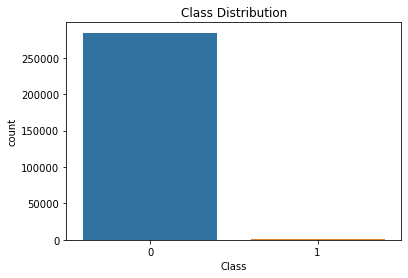

In [14]:
#Plotting the difference betweeen fraud and non-fraud transactions
sns.countplot(df['Class'])
plt.title('Class Distribution')

**Distribution of the Transaction Amount and Time**

Text(0.5, 1.0, 'Distribution of Time')

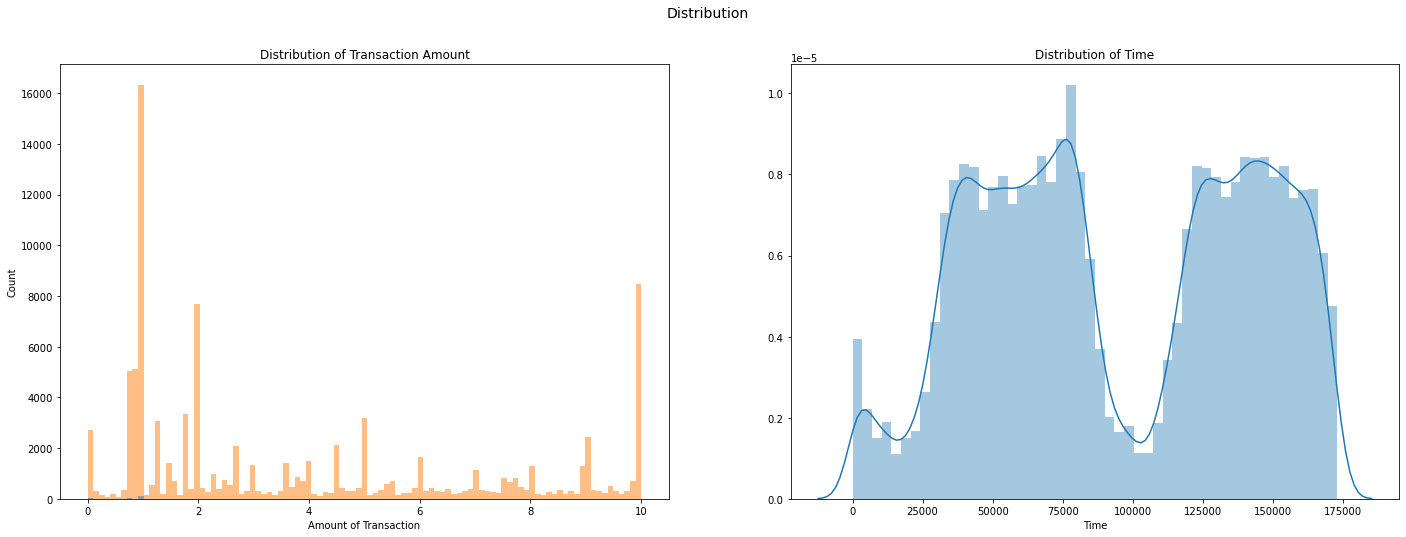

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,8))

# labels = ['No Fraud', 'Fraud']
f.suptitle('Distribution', fontsize=14)


#Distribution of Transaction Amount

bins = np.linspace(0, 10, 100)

data_nf = df[df['Class']==0]
data_f = df[df['Class']==1]

ax1.hist(data_nf['Amount'],bins=bins, label='Non-Fraud',alpha=0.5,color='tab:orange')
ax1.hist(data_f['Amount'],bins=bins,label='Fraud', alpha=0.5, color='tab:blue')

ax1.set_xlabel('Amount of Transaction')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Transaction Amount')


#Distribution of Time
ax2=sns.distplot(df['Time'])
ax2.set_title('Distribution of Time')


**Note:** Notice that we have an imbalanced dataset where most of the transactions is non-fraud. If we use it as it is we can get a lot of error or an overfitting since it's more biased for the non-fraud transaction. So we have to handle it first. For this project, I will do :
1. Under-Sampling method
2. Over-Sampling method
3. Smote (over-sampling the negatives and under-sampling the positive)

**Data Analysis**

In this section, we will look at missing value and categorize the columns but since we don't know what columns it is besides the 'Time', 'Amount', and 'Class', we will only look at the missing value.

In [19]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

It seems like we don't have any missing value, so we don't have to do anyting here.

# Scaling

Because the **Amount** and the **Time** value is bigger than the other value in each columns, we have to scale it so we can apply the machine learning algorithm correctly.

In [20]:
dataset = df.copy()

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaling = scaler.fit_transform(np.array(dataset['Amount']).reshape(-1, 1))
scaling2 = scaler.fit_transform(np.array(dataset['Time']).reshape(-1, 1))

In [22]:
dataset['Amount']=scaling
dataset['Time']=scaling2

# See The Correlation

We have an imbalanced dataset so we can't see the correlation really well, so we have to handle it first. I will use SMOTE to handle the imbalanced dataset. Note that I'm doing this only to see the correlation between each feature.

In [24]:
#Determine the X and y
X = dataset.drop('Class', axis=1)
y = dataset['Class']

from collections import Counter
from imblearn.combine import SMOTETomek

#Implementing the technique
smk = SMOTETomek(random_state=42)

# fit and apply the transform
X_smk, y_smk = smk.fit_resample(X, y)

# summarize class distribution
print(Counter(y))
print(Counter(y_smk))

Counter({0: 284315, 1: 492})
Counter({0: 284315, 1: 284315})


In [25]:
#Make a train set dataframe for SMOTE
df_smote = X_smk
df_smote['Class']=y_smk

#Reset the index
df_smote['index']=[i for i in range(len(df_smote))]
df_smote = df_smote.set_index('index')

X_smk = X_smk.drop(['index','Class'],axis=1)

Text(0.5, 1.0, 'Class Distribution')

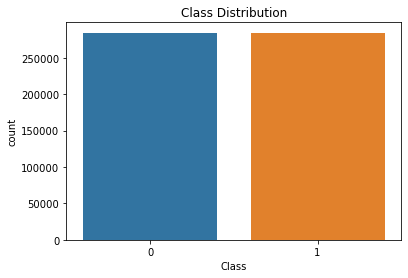

In [26]:
#Plotting the difference betweeen fraud and non-fraud transactions
sns.countplot(df_smote['Class'])
plt.title('Class Distribution')

Text(0.5, 1.0, 'After SMOTE')

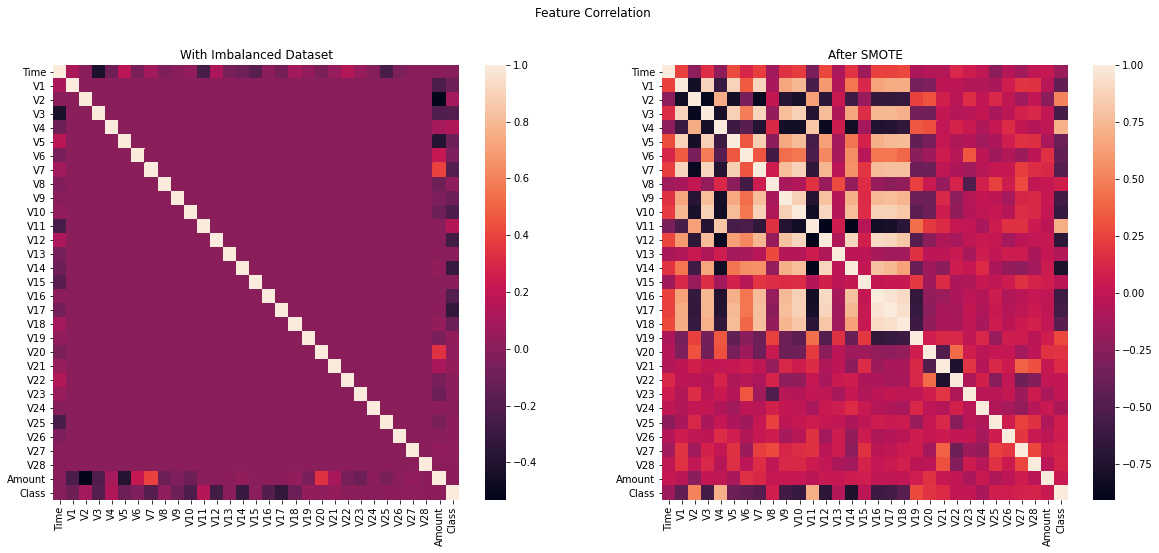

In [27]:
#Plot a heatmap
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,8))
fig.suptitle('Feature Correlation')

#Imbalanced Dataset
sns.heatmap(dataset.corr(),ax=axes[0])
axes[0].set_title('With Imbalanced Dataset')

#Data after SMOTE
sns.heatmap(df_smote.corr(),ax=axes[1])
axes[1].set_title('After SMOTE')

# Removing Extreme Outliers

**See if feature have a positive or negative correlation**

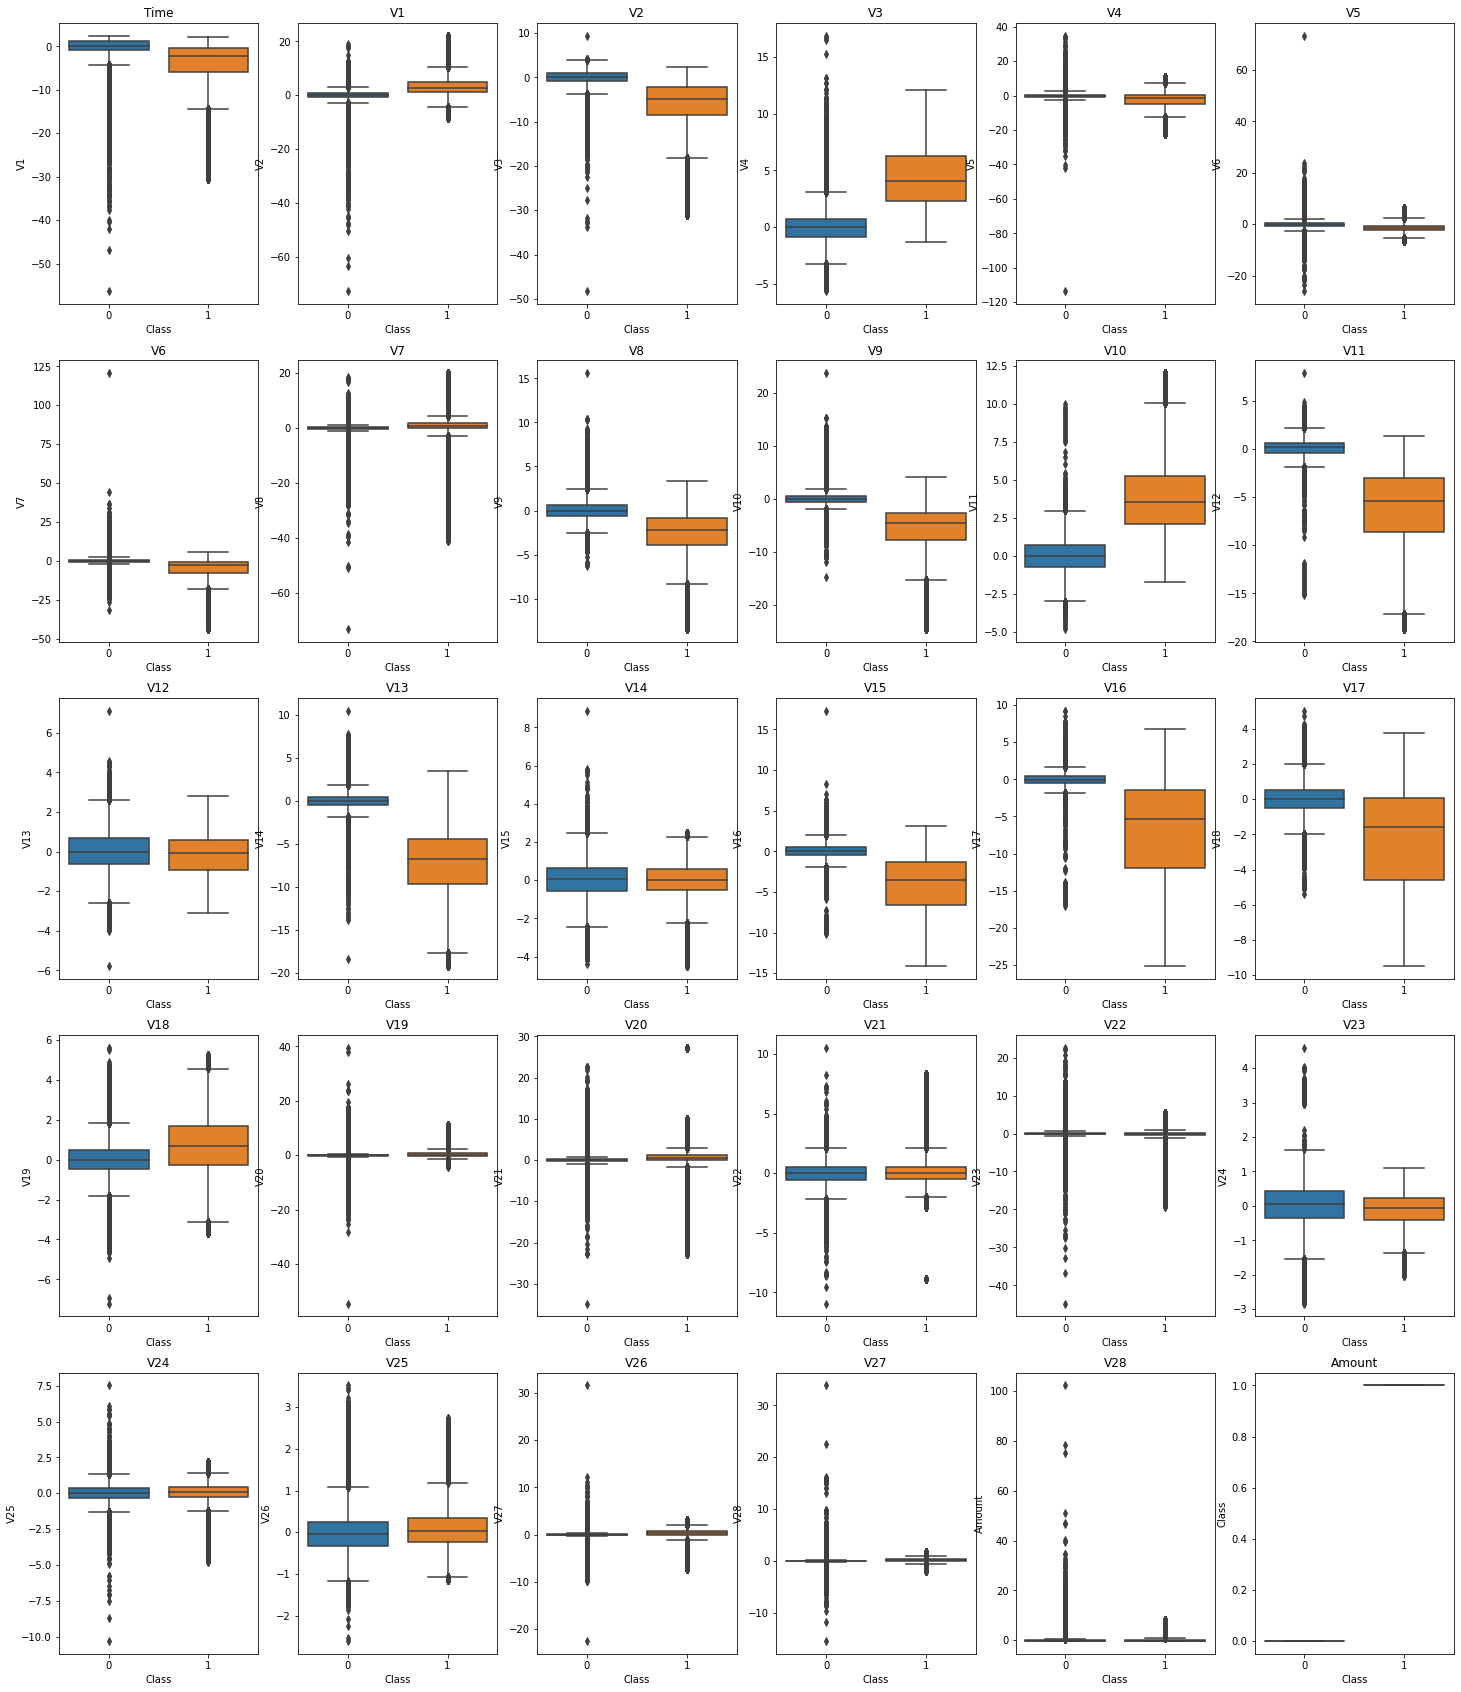

In [28]:
col = [i for i in df_smote.columns if i!='Class']

n_rows = 5
n_cols = 6
count = 0
col_num = 1

plt.subplots(n_rows, n_cols, figsize=(25,30))

for i in range(n_rows):
    for j in range(n_cols):
        plt.subplot(n_rows, n_cols, count+1)
        sns.boxplot(y=df_smote.iloc[:, col_num],x=df_smote["Class"])
        plt.title(col[col_num-1])
        if col_num < df.shape[1] :
            count += 1
            col_num += 1

plt.show()


From the boxplot, we can see that:

**Negative Correlation:** Time V2 V6 V8 V9 V11 V13 V15 V16 V17
    
**Positive Correlation:** V1 V3 V10 V18

And we can see that feature that have a high correlation with the class is V2 V3 V8 V10 V11 V13 V15 V16 V17 V18 so we will remove outliers from this dataset

In [29]:
out = ['V2', 'V3', 'V8', 'V10', 'V11', 'V13', 'V15', 'V16', 'V17', 'V18']

new_df = df_smote.copy()

for i in out:
    fraud = new_df[i].loc[new_df['Class'] == 1].values
    q25, q75 = np.percentile(fraud, 25), np.percentile(fraud, 75)

    iqr = q75 - q25

    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    outliers = [x for x in fraud if x < lower or x > upper]

    #Drop outliers from dataset
    new_df = new_df.drop(new_df[(new_df[i] > upper) | (new_df[i] < lower)].index)

Text(0.5, 1.0, 'After')

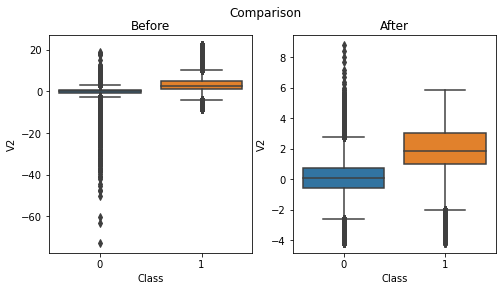

In [30]:
#Compare dataset
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(8,4))
fig.suptitle('Comparison')

sns.boxplot(x="Class", y='V2', data=df_smote,ax=axes[0])
axes[0].set_title('Before')

sns.boxplot(x="Class", y='V2', data=new_df,ax=axes[1])
axes[1].set_title('After')

Text(0.5, 1.0, 'After')

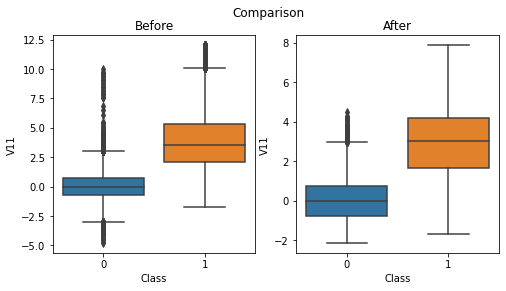

In [31]:
#Compare dataset
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(8,4))
fig.suptitle('Comparison')

sns.boxplot(x="Class", y='V11', data=df_smote,ax=axes[0])
axes[0].set_title('Before')

sns.boxplot(x="Class", y='V11', data=new_df,ax=axes[1])
axes[1].set_title('After')

Text(0.5, 1.0, 'Class Distribution')

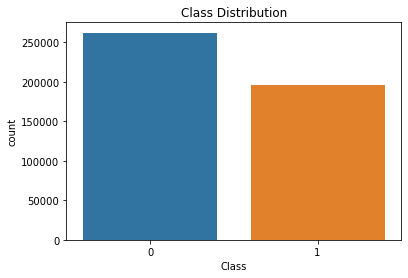

In [32]:
#Plotting the difference betweeen fraud and non-fraud transactions
sns.countplot(new_df['Class'])
plt.title('Class Distribution')

After removing the extreme outlier, we can see that most of the outliers is from the Fraud dataset

In [33]:
print('**Before Removing Outliers**')
print('Non-Fraud Transaction:',df_smote['Class'].value_counts()[0])
print('Fraud Transaction:',df_smote['Class'].value_counts()[1])
print(' ')
print('**After Removing Outliers**')
print('Non-Fraud Transaction:',new_df['Class'].value_counts()[0])
print('Fraud Transaction:',new_df['Class'].value_counts()[1])
print(' ')
print('**Reduce Number**')
print('Non-Fraud Transaction:',df_smote['Class'].value_counts()[0]-new_df['Class'].value_counts()[0])
print('Fraud Transaction:',df_smote['Class'].value_counts()[1]-new_df['Class'].value_counts()[1])

**Before Removing Outliers**
Non-Fraud Transaction: 284315
Fraud Transaction: 284315
 
**After Removing Outliers**
Non-Fraud Transaction: 262219
Fraud Transaction: 196315
 
**Reduce Number**
Non-Fraud Transaction: 22096
Fraud Transaction: 88000


# **Dataset Random Under-Sampling**

In [82]:
# import the library
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_us, y_us = undersample.fit_resample(X, y)

# summarize class distribution
print(Counter(y))
print(Counter(y_us))

Counter({0: 284315, 1: 492})
Counter({0: 492, 1: 492})


In [83]:
#Make a train set dataframe for random under sampling
df_us = X_us
df_us['Class']=y_us

#Reset the index
df_us['index']=[i for i in range(len(df_us))]
df_us = df_us.set_index('index')

X_us = X_us.drop(['index','Class'],axis=1)

# Analyze each Dataset

Here I will compare these dataset to find which technique fits the best for this imbalanced dataset:
1. Random Under Sampling
2. SMOTE
3. SMOTE + Outliers
4. Original Dataset

In [176]:
datas = {'Random-Under-Sampling': df_us, 'SMOTE' : df_smote,'SMOTE+Outliers' : new_df, 'Ori Dataset':dataset}

precision_recall_score={}
crossval_score={}
class_report={}
accuracyscore={} 
f1score={}
rocauc_score={}

In [202]:
#import library needed
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#import parameter
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score



for i in range(len(datas)):
    #Split dataset
    X = (list(datas.values())[i]).drop('Class', axis=1)
    y = (list(datas.values())[i])['Class']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state = 42)

    # Turn the values into an array for feeding the classification algorithms.
    X_train = X_train.values
    X_test = X_test.values
    y_train = y_train.values
    y_test = y_test.values
    
    classifiers = {
    "LogisiticRegression": LogisticRegression()
    }
    
    #Fit the data into the model
    log_reg = LogisticRegression().fit(X_train, y_train)
    
    #Test the model to the test dataset and calculate the average precision-recall score
    y_score = log_reg.predict(X_test)
    average_precision = average_precision_score(y_test, y_score)
    precision_recall_score[list(datas.keys())[i]]=average_precision

    #Print out the classification report
    clas_report = classification_report(y_test, y_score)
    class_report[list(datas.keys())[i]]=clas_report

    #Print out the cross validation score
    training_score = cross_val_score(classifier, X_test, y_test, cv=5)
    crossval_score[list(datas.keys())[i]]=training_score.mean()
    
    acc_score = accuracy_score(y_test, y_score)
    accuracyscore[list(datas.keys())[i]]=acc_score
    
    f1=precision_recall_fscore_support(y_true, y_pred, average='binary')
    f1score[list(datas.keys())[i]]=f1
 
    rocauc=roc_auc_score(y, clf.decision_function(X_train))
    rocauc_score[list(datas.keys())[i]]=rocauc

# Precision-Recall Curve 

In [212]:
# precision-recall curve and f1
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

f1={}
aucscore={}
recall={}
precision={}

for i in range(len(datas)):
    #Split dataset
    X = (list(datas.values())[i]).drop('Class', axis=1)
    y = (list(datas.values())[i])['Class']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state = 42)

    # Turn the values into an array for feeding the classification algorithms.
    X_train = X_train.values
    X_test = X_test.values
    y_train = y_train.values
    y_test = y_test.values
    
    #fit into a model
    model = LogisticRegression(solver='lbfgs')
    model.fit(X_train, y_train)

    # predict probabilities
    lr_probs = model.predict_proba(X_test)

    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]

    # predict class values
    yhat = model.predict(X_test)
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)

    # summarize scores
    recall[list(datas.keys())[i]]=lr_recall
    precision[list(datas.keys())[i]]=lr_precision
    
    f1[list(datas.keys())[i]]=f1_score(y_test, yhat)
    aucscore[list(datas.keys())[i]]=auc(lr_recall, lr_precision)

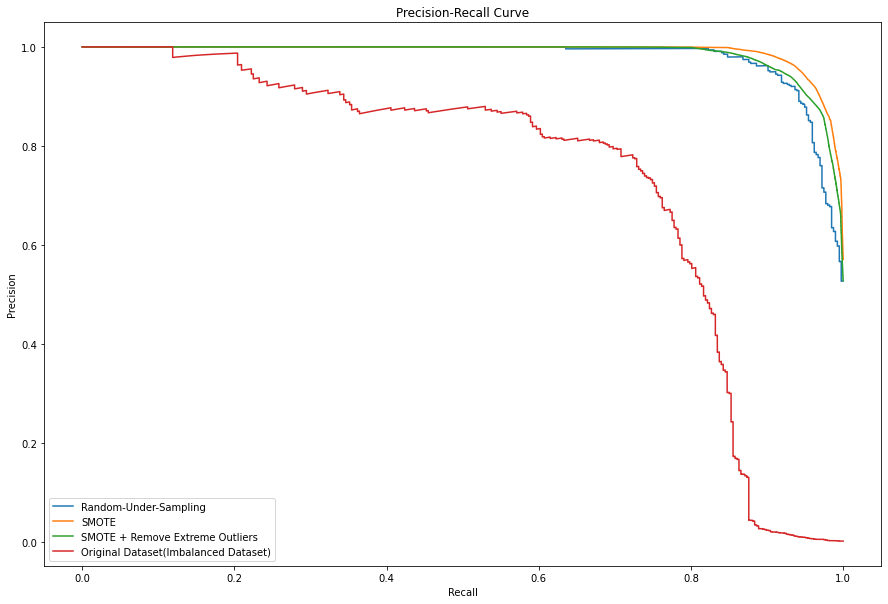

In [239]:
# plot the precision-recall curves 
plt.plot(list(recall.values())[0], list(precision.values())[0],  label=list(recall.keys())[0])
plt.plot(list(recall.values())[1], list(precision.values())[1],  label=list(recall.keys())[1])
plt.plot(list(recall.values())[2], list(precision.values())[2],  label='SMOTE + Remove Extreme Outliers')
plt.plot(list(recall.values())[3], list(precision.values())[3],  label='Original Dataset(Imbalanced Dataset)')

# axis labels
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

# show the legend
plt.legend()

# show the plot
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

# ROC-AUC Curve

In [222]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

auc2={}
fpr={}
tpr={}

for i in range(len(datas)):
    #Split dataset
    X = (list(datas.values())[i]).drop('Class', axis=1)
    y = (list(datas.values())[i])['Class']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state = 42)

    # Turn the values into an array for feeding the classification algorithms.
    X_train = X_train.values
    X_test = X_test.values
    y_train = y_train.values
    y_test = y_test.values
    
    #fit into a model
    model = LogisticRegression(solver='lbfgs')
    model.fit(X_train, y_train)

    # predict probabilities
    lr_probs = model.predict_proba(X_test)

    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]

    # calculate scores
    lr_auc = roc_auc_score(y_test, lr_probs)
    
    # calculate roc curves
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    
    auc2[list(datas.keys())[i]]=lr_auc
    fpr[list(datas.keys())[i]]=lr_fpr
    tpr[list(datas.keys())[i]]=lr_tpr

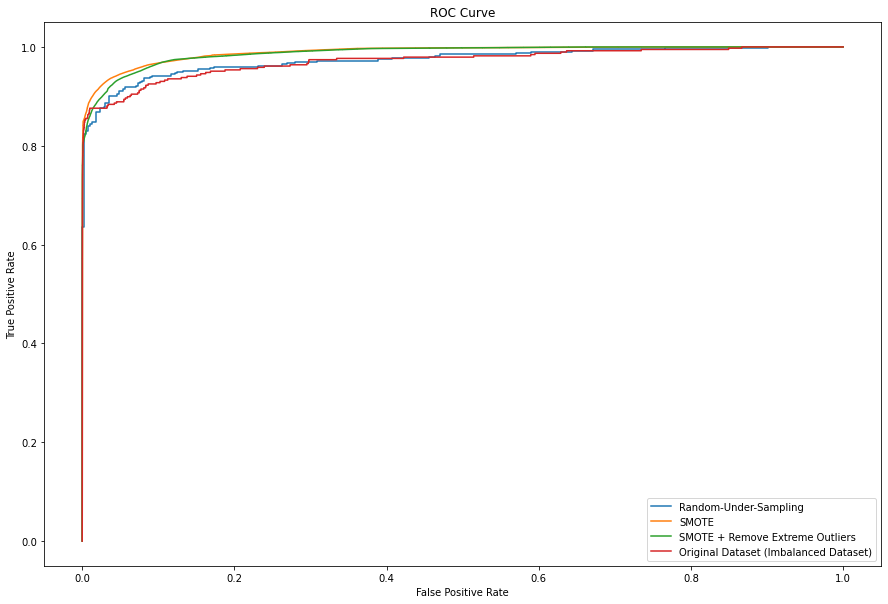

In [240]:
# plot the roc curve for the model
plt.plot(list(fpr.values())[0], list(tpr.values())[0],  label=list(tpr.keys())[0])
plt.plot(list(fpr.values())[1], list(tpr.values())[1],  label=list(tpr.keys())[1])
plt.plot(list(fpr.values())[2], list(tpr.values())[2],  label='SMOTE + Remove Extreme Outliers')
plt.plot(list(fpr.values())[3], list(tpr.values())[3],  label='Original Dataset (Imbalanced Dataset)')

# axis labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()
fig = plt.gcf()
fig.set_size_inches(15, 10)

# show the plot
plt.show()

Since from both Precision-Recall and ROC-AUC curve, the dataset wiht SMOTE Technique fits the best I will use that dataset.

# Implement Model

In this project I will use these model and compare it to find which one fits the best for this dataset :
    1. Logistic Regression
    2. K-Nearest Neighbor
    3. Support Vector Machine
    4. Decision Tree

In [252]:
#import library needed
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

# Precision-Recall Curve for Machine Learning Model

In [258]:
# precision-recall curve and f1
f1_ml={}
aucscore_ml={}
recall_ml={}
precision_ml={}

#Split dataset
X = df_smote.drop('Class', axis=1)
y = df_smote['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state = 42)

# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

for key, classifier in classifiers.items():
    #fit dataset into a machine learning
    if key=="Support Vector Classifier":
        model = SVC(kernel='rbf', C=1e9, gamma=1e-07, probability=True).fit(X_train,y_train)
    else:
        model = classifier.fit(X_train, y_train)

    # predict probabilities
    lr_probs = model.predict_proba(X_test)

    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]

    # predict class values
    yhat = model.predict(X_test)
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)

    # summarize scores
    recall_ml[key]=lr_recall
    precision_ml[key]=lr_precision
    
    f1_ml[key]=f1_score(y_test, yhat)
    aucscore_ml[key]=auc(lr_recall, lr_precision)

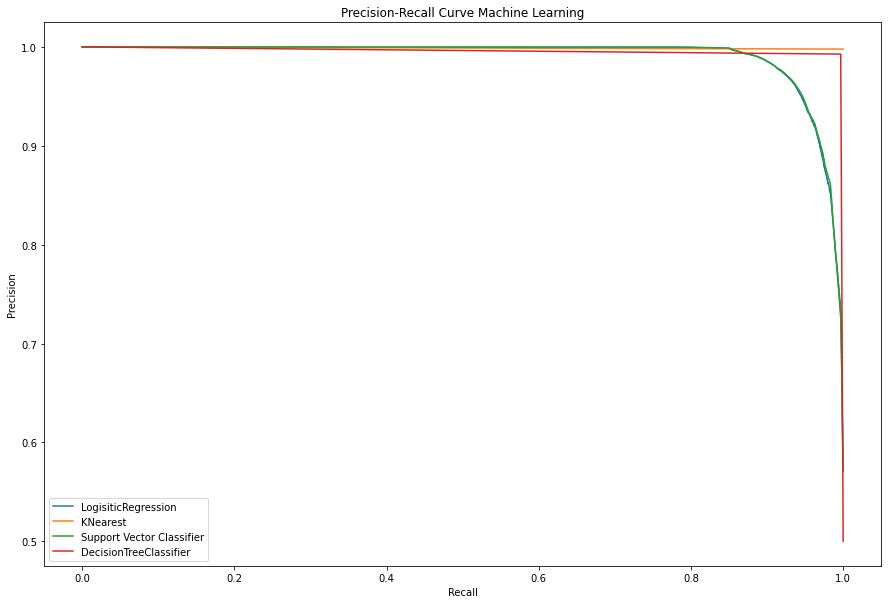

In [259]:
# plot the precision-recall curves 
plt.plot(list(recall_ml.values())[0], list(precision_ml.values())[0],  label=list(recall_ml.keys())[0])
plt.plot(list(recall_ml.values())[1], list(precision_ml.values())[1],  label=list(recall_ml.keys())[1])
plt.plot(list(recall_ml.values())[2], list(precision_ml.values())[2],  label=list(recall_ml.keys())[2])
plt.plot(list(recall_ml.values())[3], list(precision_ml.values())[3],  label=list(recall_ml.keys())[3])

# axis labels
plt.title('Precision-Recall Curve Machine Learning')
plt.xlabel('Recall')
plt.ylabel('Precision')

# show the legend
plt.legend()

# show the plot
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

# ROC-AUC Curve for Machine Learning Model

In [260]:
# roc curve and auc
auc2_ml={}
fpr_ml={}
tpr_ml={}

#Split dataset
X = df_smote.drop('Class', axis=1)
y = df_smote['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state = 42)

# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

for key, classifier in classifiers.items():
    #fit dataset into a machine learning
    if key=="Support Vector Classifier":
        model = SVC(kernel='rbf', C=1e9, gamma=1e-07, probability=True).fit(X_train,y_train)
    else:
        model = classifier.fit(X_train, y_train)

    # predict probabilities
    lr_probs = model.predict_proba(X_test)

    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]

    # calculate scores
    lr_auc = roc_auc_score(y_test, lr_probs)
    
    # calculate roc curves
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    
    auc2_ml[key]=lr_auc
    fpr_ml[key]=lr_fpr
    tpr_ml[key]=lr_tpr

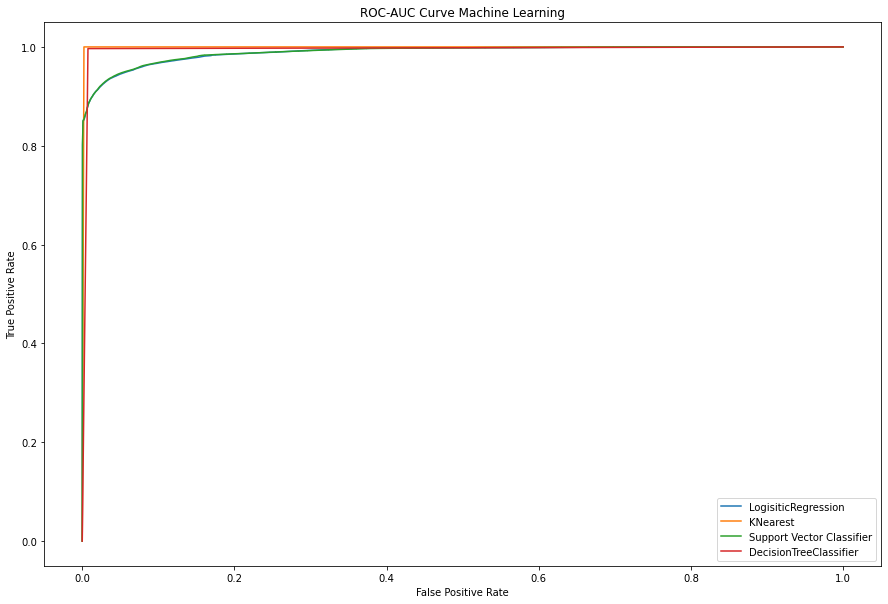

In [261]:
# plot the roc curve for the model
plt.plot(list(fpr_ml.values())[0], list(tpr_ml.values())[0],  label=list(tpr_ml.keys())[0])
plt.plot(list(fpr_ml.values())[1], list(tpr_ml.values())[1],  label=list(tpr_ml.keys())[1])
plt.plot(list(fpr_ml.values())[2], list(tpr_ml.values())[2],  label=list(tpr_ml.keys())[2])
plt.plot(list(fpr_ml.values())[3], list(tpr_ml.values())[3],  label=list(tpr_ml.keys())[3])

# axis labels
plt.title('ROC-AUC Curve Machine Learning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()
fig = plt.gcf()
fig.set_size_inches(15, 10)

# show the plot
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# Create a DataFrame with all the scores and the classifiers names.
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)



from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))